<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-и-анализ-данных" data-toc-modified-id="Предобработка-и-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка и анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-количественных-данных" data-toc-modified-id="Анализ-количественных-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ количественных данных</a></span></li><li><span><a href="#Анализ-категориальных-данных" data-toc-modified-id="Анализ-категориальных-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ категориальных данных</a></span></li><li><span><a href="#Выводы-по-анализу-данных" data-toc-modified-id="Выводы-по-анализу-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы по анализу данных</a></span></li><li><span><a href="#Подготовка-данных-к-моделированию" data-toc-modified-id="Подготовка-данных-к-моделированию-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подготовка данных к моделированию</a></span></li></ul></li><li><span><a href="#Построение-базовой-нейронной-сети" data-toc-modified-id="Построение-базовой-нейронной-сети-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение базовой нейронной сети</a></span><ul class="toc-item"><li><span><a href="#Создание-и-обучение-НС" data-toc-modified-id="Создание-и-обучение-НС-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создание и обучение НС</a></span></li><li><span><a href="#График-«Факт-—-Прогноз»" data-toc-modified-id="График-«Факт-—-Прогноз»-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>График «Факт — Прогноз»</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Улучшение-нейронной-сети" data-toc-modified-id="Улучшение-нейронной-сети-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Улучшение нейронной сети</a></span><ul class="toc-item"><li><span><a href="#Улучшение-модели" data-toc-modified-id="Улучшение-модели-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Улучшение модели</a></span></li><li><span><a href="#Результаты-работы" data-toc-modified-id="Результаты-работы-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Результаты работы</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Прогнозирование темпаратуры звезды

## Описание проекта

**Заказчик**

Обсерватории «Небо на ладони»

**Задача:** 
C помощью нейросети определять температуру на поверхности обнаруженных звёзд.

**Данные:**
- Относительная светимость L/Lo — светимость звезды относительно Солнца;
- Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца;
- Абсолютная звёздная величина Mv — физическая величина, характеризующая блеск звезды;
- Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа;
- Тип звезды;
- Абсолютная температура T(K) — температура на поверхности звезды в Кельвинах - целевой параметр.

В базе обсерватории есть характеристики уже изученных 240 звёзд.

## Загрузка данных

In [1]:
# Загружаем библиотеки.
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt, ceil

In [2]:
#Сохраняем путь к файлу на сервере Практикума.
server_path = '/datasets/6_class.csv' 

#Сохраняем путь к файлу на компьютере. 
local_path = 'datasets/6_class.csv' 

try:                                                   #Пробуем найти данные по сетевому адресу,
    df = pd.read_csv(server_path) 
except:                                                #если не находим по сетевому, ищем по локальному.
    df = pd.read_csv(local_path) 

In [3]:
# Проверяем заргузку данных.
df.head()

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,1939,0.000138,0.1030,20.06,0,Red


In [4]:
# Проверяем типы и нуливые значения.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              240 non-null    int64  
 1   Temperature (K)         240 non-null    int64  
 2   Luminosity(L/Lo)        240 non-null    float64
 3   Radius(R/Ro)            240 non-null    float64
 4   Absolute magnitude(Mv)  240 non-null    float64
 5   Star type               240 non-null    int64  
 6   Star color              240 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 13.2+ KB


In [5]:
# Убираем лишнее, можно всегда воспользоваться индексами. 
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
# Переименовываем для удобства.
df.columns = ['temperature', 'luminosity', 'radius', 'absolute_magnitude', 'star_type', 'star_color']

In [7]:
# Проверяем результат.
df.columns

Index(['temperature', 'luminosity', 'radius', 'absolute_magnitude',
       'star_type', 'star_color'],
      dtype='object')

## Предобработка и анализ данных

In [8]:
categorical = ['star_type', 'star_color']
numeric = ['temperature', 'luminosity', 'radius', 'absolute_magnitude']

### Анализ количественных данных

In [9]:
# Характеристики количественных данных.
df[numeric].describe()

,temperature,luminosity,radius,absolute_magnitude
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


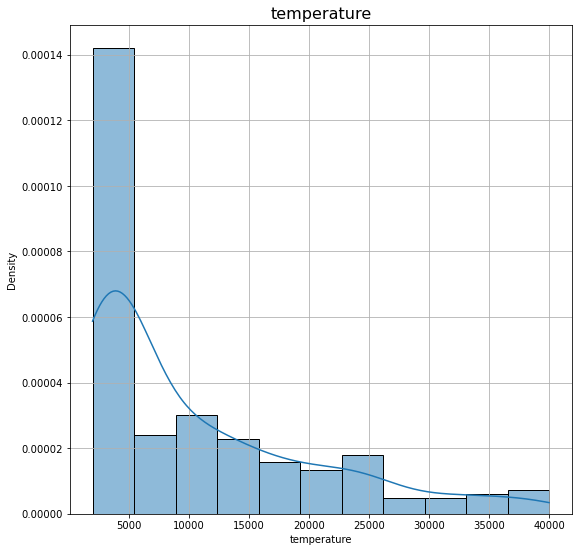

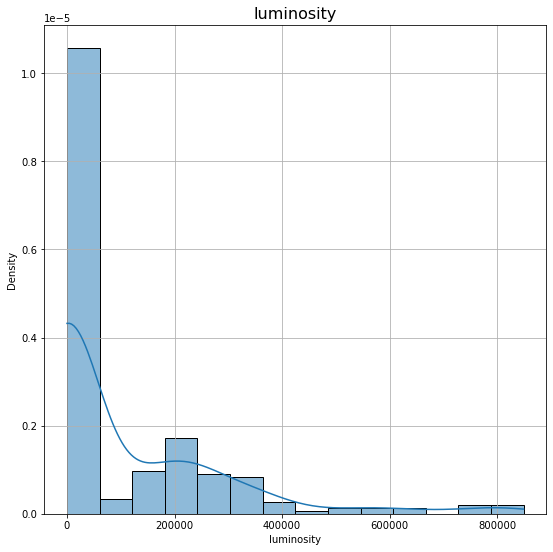

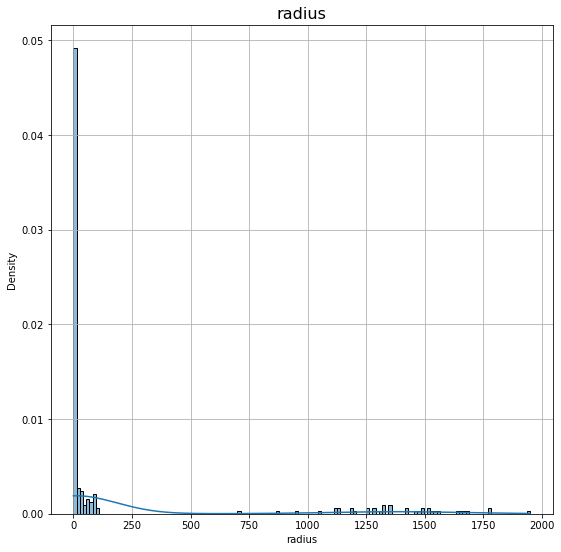

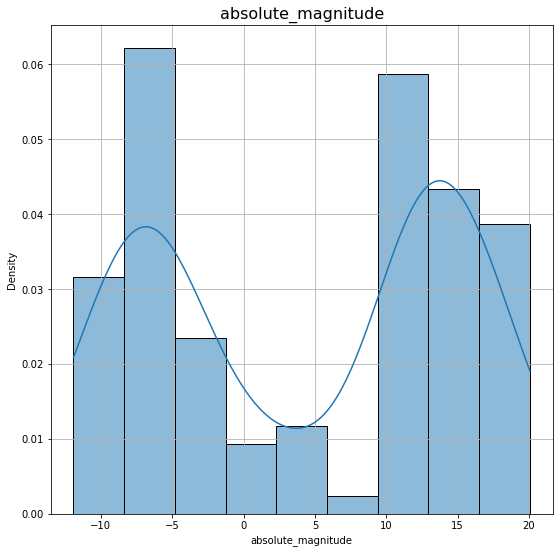

In [10]:
# Строим гистограммы плотности по количественным данным. 
for column in numeric:
    plt.subplots(figsize=(9, 9))
    plt.title(column, fontsize=16)
    sns.histplot(      # гистограммы плотности
            df[column], 
            kde=True,
            stat="density", 
            linewidth=1)       
    plt.grid(True)
    plt.show()

### Анализ категориальных данных  

In [11]:
# Смотрим распределение по типу звезд. 
df['star_type'].value_counts(normalize=True)

0    0.166667
1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
Name: star_type, dtype: float64

In [12]:
# Смотрим значения цвета. 
df['star_color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [13]:
# Приводим к одному регистру
df['star_color'] = df['star_color'].str.lower()

In [14]:
# Объявление функции star_color_rename с параметром x, которая заменяет цвет звезды.

def star_color_rename(x):
    if x in ['blue white', 'blue-white', 'blue white ']:
        return 'blue_white'
    elif x in ['blue ']:
        return 'blue'
    elif x in ['whitish']:
        return 'white'
    elif x in ['white-yellow', 'yellow-white', 'yellowish white']:
        return 'white_yellow'
    elif x in ['yellowish']:
        return 'yellow'
    elif x in ['pale yellow orange']:
        return 'yellow_orange'
    elif x in ['orange-red']:
        return 'orange_red'
    else:
        return x

In [15]:
# Убираем не явные дубликаты по цвету звезды.
df['star_color'] = df['star_color'].apply(star_color_rename)

In [16]:
# Проверяем результат
df['star_color'].unique()

array(['red', 'blue_white', 'white', 'white_yellow', 'yellow_orange',
       'blue', 'orange', 'yellow', 'orange_red'], dtype=object)

In [17]:
# # Смотрим распределение по цвету. 
df['star_color'].value_counts(normalize=True)

red              0.466667
blue             0.233333
blue_white       0.170833
white            0.050000
white_yellow     0.050000
yellow           0.012500
orange           0.008333
yellow_orange    0.004167
orange_red       0.004167
Name: star_color, dtype: float64

In [18]:
# Укрупняем классы.
df.loc[df['star_color'].isin(['yellow_orange', 'orange_red']), 'star_color'] = 'orange'

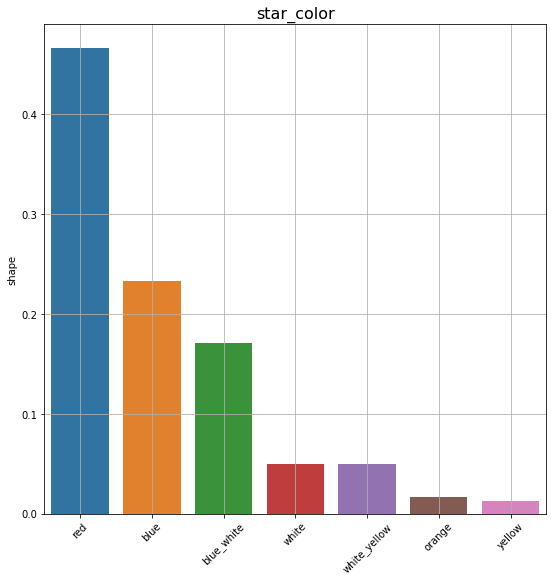

In [19]:
# Выводим столбчатую диаграмму
col = df['star_color'].value_counts(normalize=True)
plt.subplots(figsize=(9, 9))
plt.title('star_color', fontsize=16)
sns.barplot(
    x=col.index,
    y=col)
plt.grid(True)
plt.ylabel('shape')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Убираем радиус.--
df = df.drop(['radius'], axis=1)

### Выводы по анализу данных

- Абсолютная температура T(K) – пуассоновское распределение с тяжелым правым хвостом, половина звёзд до 5700 К. 
- Относительная светимость (luminosity) – очень сильная разница между минимальным и максимальным значением 10 в 10 раза, но есть группа объектов со светимостью 200000;
- Относительный радиус (radius) – довольно тяжелые данные для анализа сильный разброс сильные выбросы, если попробовать категорировать скорее всего получим шкалу очень похожую на тип звезды, решил оказаться от этого параметра; 
- Абсолютная звёздная величина (absolute_magnitude)  – интересное распределение с 2 явными группами, шкала довольно компактная выбросов аномалий нет;
- Звёздный цвет (star_color) – много неявных дубликатов, исправил, плюс есть маленькие группы yellow_orange', 'orange_red' их объединил с 'orange', привел шкалу цветов к принятой классификации;
- Тип звезды (star_type) – всех типов по 40 штук, очень любопытно;

### Подготовка данных к моделированию

In [21]:
df_ohe = pd.get_dummies( # OHE двух признаков
    df,
    drop_first=True,
    columns=categorical
)

In [22]:
# Разбиваем на признаки и целевой признак.
target = df_ohe['temperature']
features = df_ohe.drop(['temperature'] , axis=1)

In [23]:
# Разбиваем на тренеровочную и валидационную выборки
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target, 
    test_size=0.3, 
    random_state=12345,
    shuffle=True,
)

In [24]:
# Проверяем разбиение
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(168, 13)
(168,)
(72, 13)
(72,)


In [25]:
# Скалируем метрики.
pd.options.mode.chained_assignment = None

numeric = ['luminosity',
           'absolute_magnitude']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [26]:
# Создаем тензоры
X_train = torch.FloatTensor(features_train.values)
X_test = torch.FloatTensor(features_test.values)
y_train = torch.FloatTensor(target_train.values)
y_test = torch.FloatTensor(target_test.values)

## Построение базовой нейронной сети

### Создание и обучение НС

In [27]:
# Параметры НС.
n_in_neurons = features_train.shape[1]
n_hidden_neurons_1 = 10
n_hidden_neurons_2 = 4
n_out_neurons = 1
learning_rate = 0.01
num_epochs = 10000

In [28]:
# Создаем класс НС, определяем два метода.
class Baseline(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, # Инициализация
                 n_hidden_neurons_2, n_out_neurons):
        super(Baseline, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
               
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
                
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
       
        
    def forward(self, x): # Вычисление
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
       
        return x

In [29]:
net = Baseline(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons) # Создаем сеть.

optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate) # Определяем оптимизатор.

loss = nn.MSELoss() #Задаем функцию потерь

In [30]:
# Обучение НС

rmse_train = []
rmse_test = []
epoch_100 = []

for epoch in range(num_epochs):
    optimizer.zero_grad()

    preds = net.forward(X_train).flatten()

    loss_value = loss(preds, y_train)
    loss_value.backward()

    optimizer.step()

    if epoch % 100 == 0 or epoch == num_epochs - 1:
        net.eval()
        train_preds = net.forward(X_train)
        test_preds = net.forward(X_test)
        rmse_train.append(sqrt(mean_squared_error(y_train.detach().numpy(), train_preds.detach().numpy())))
        rmse_test.append(sqrt(mean_squared_error(y_test.detach().numpy(), test_preds.detach().numpy())))
        epoch_100.append(epoch)
        

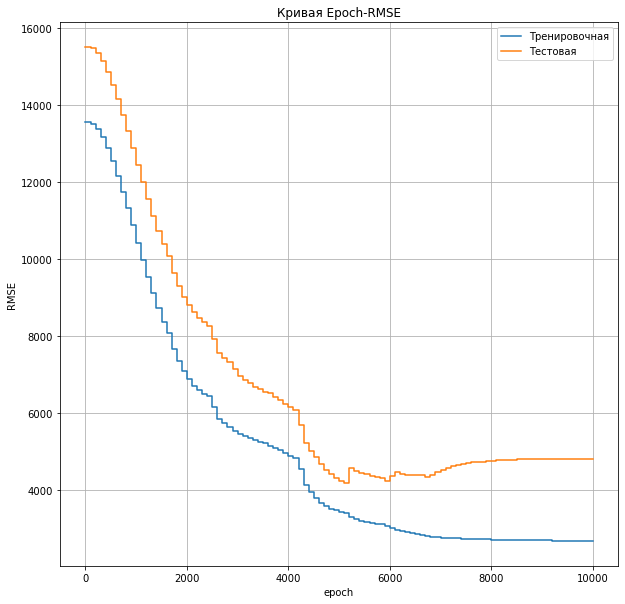

In [31]:
# Строим график изменения RMSE от количества эпох.
plt.figure(figsize=(10, 10))
plt.step(epoch_100, rmse_train, where='post')
plt.step(epoch_100, rmse_test, where='post')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.grid(True)
plt.title('Кривая Epoch-RMSE')
plt.legend(['Тренировочная', 'Тестовая'])
plt.show() 

### График «Факт — Прогноз»

In [32]:
# Вычисляем прогноз на тренировозных данных
net.eval()
pred_train = list(net.forward(X_train).detach().numpy())
pred_train = pd.Series(pred_train, index=target_train.index).astype('int64').sort_index()

In [33]:
rmse_baseline_train = sqrt(mean_squared_error(target_train.sort_index(), pred_train))
print(f'RMSE базовой модели на тренировочных данных -{rmse_baseline_train: .2f}')

RMSE базовой модели на тренировочных данных - 2664.35


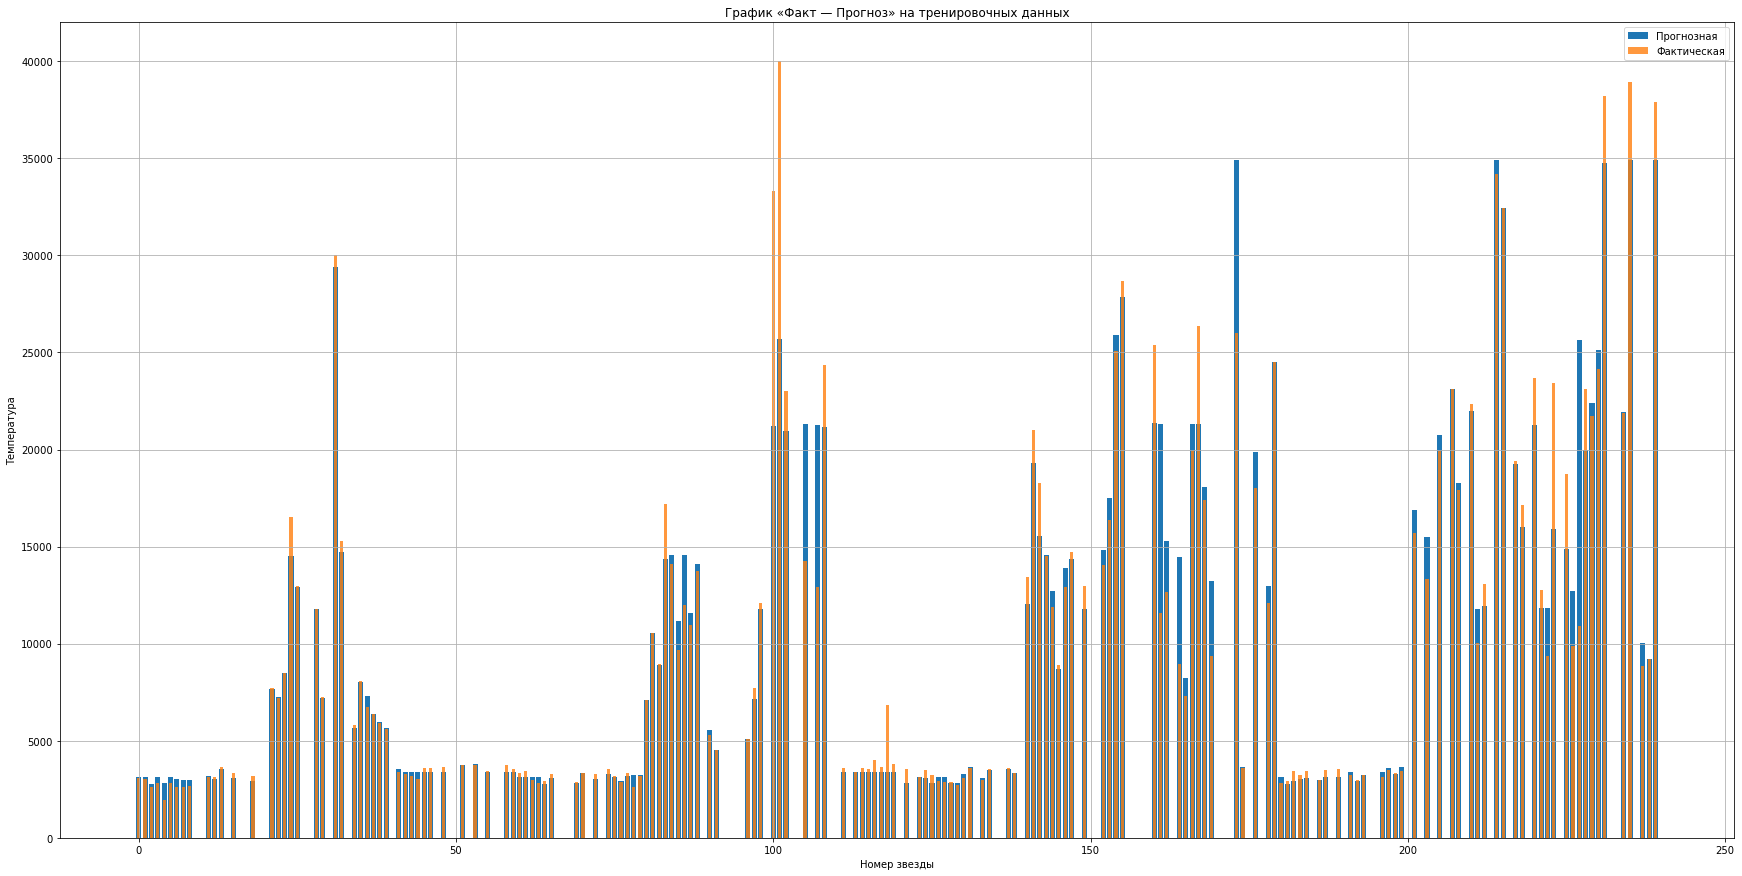

In [34]:
# Строим график
plt.figure(figsize=(30, 15))
plt.title('График «Факт — Прогноз» на тренировочных данных' )
plt.xlabel('Номер звезды')
plt.ylabel('Температура')
plt.bar(x=pred_train.index, height = pred_train, width= 0.8)
plt.bar(x=pred_train.index, height = target_train.sort_index(), width= 0.5, alpha=0.8)
plt.legend(['Прогнозная', 'Фактическая'])
plt.grid(True)
plt.show() 

In [35]:
# Вычисляем прогноз на валидационных данных
net.eval()
pred_test = list(net.forward(X_test).detach().numpy())
pred_test = pd.Series(pred_test, index=target_test.index).astype('int64').sort_index()

In [36]:
rmse_baseline_test = sqrt(mean_squared_error(target_test.sort_index(), pred_test))
print(f'RMSE базовой модели на тестовых данных -{rmse_baseline_test: .2f}')

RMSE базовой модели на тестовых данных - 4804.07


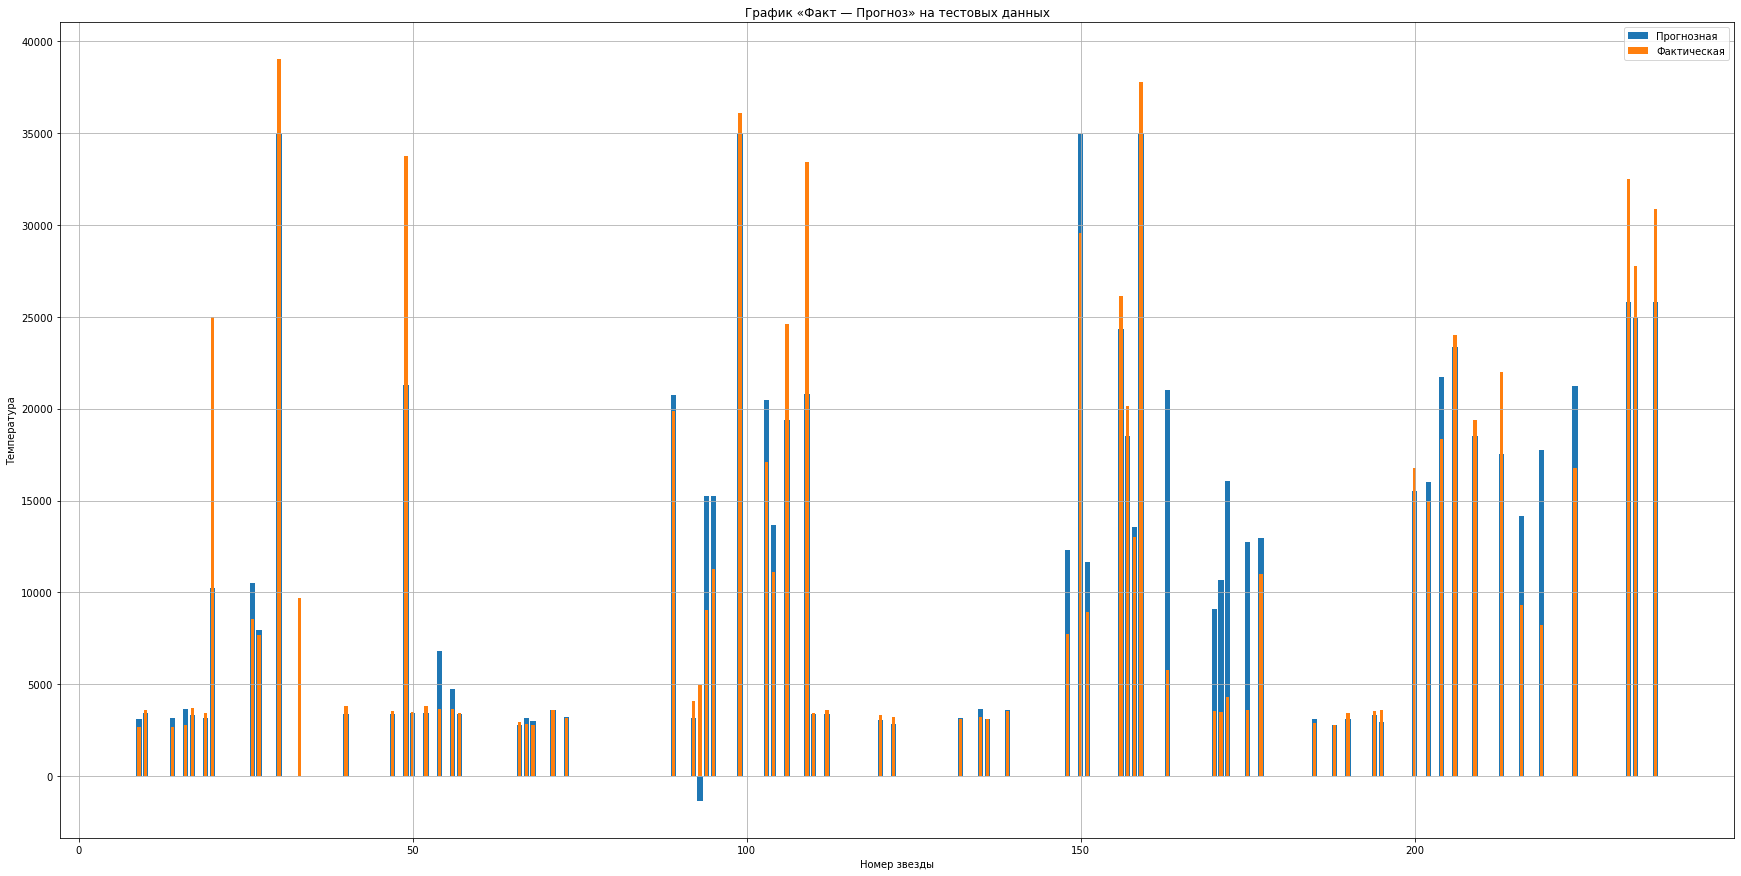

In [37]:
# Строим график
plt.figure(figsize=(30, 15))
plt.title('График «Факт — Прогноз» на тестовых данных' )
plt.xlabel('Номер звезды')
plt.ylabel('Температура')
plt.bar(x=pred_test.index, height = pred_test, width= 0.8 )
plt.bar(x=pred_test.index, height = target_test.sort_index(), width= 0.5 )
plt.legend(['Прогнозная', 'Фактическая'])
plt.grid(True)
plt.show() 

### Выводы

- Модель плохо справляется с самыми горячими звездами, она занижает их температуру,
- Где-то в районе 7500 8000 эпохи (иногда раньше) модель перестает улучшаться, и дальше начинает переобучатся. 
- Иногда модель нехотела сходится.
- Пробовал разные способы генераци весов и смещения, решил использовать дефолтные.
- Попробовал менять количество узлов и функции активации, остановился на этой. 

## Улучшение нейронной сети

### Улучшение модели

In [38]:
# Создаем класс новой НС, определяем два метода.
class Baseline_new(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1,
                 n_hidden_neurons_2, n_out_neurons, p1, p2):
        super(Baseline_new, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.dp1 = nn.Dropout(p=p1)
       
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.dp2 = nn.Dropout(p=p2)
        
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
       
       
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.dp2(x)
        x = self.fc3(x)
       
        return x

In [39]:
# Параметры для перебора, что бы уменьшить количество вложеных циклов объединил 3 парметра.
# [размер батча, доля убираемых узлов после первого скрытого слоя, доля после второго]
net_parametrs = {
    'set_1': [84, 0, 0],
    'set_2': [21, 0, 0],
    'set_3': [84, 0.5, 0.25],
    'set_4': [21, 0.5, 0.25],
    'set_5': [84, 0.8, 0.25],
    'set_6': [21, 0.8, 0.25],
}

In [40]:
# Для выбора лучшего и фиксации работы.
rmse_train_set = ['rmse_train', rmse_baseline_train]
rmse_test_set = ['rmse_test', rmse_baseline_test]
best_rmse = rmse_baseline_train
best_set = 'set_0'
best_model = net

In [41]:
# Запускаем обучение.
for sets, params in net_parametrs.items():
    
    net = Baseline_new(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons, params[1], params[2])
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    loss = nn.MSELoss()
    batch_size = params[0]
    num_batches = ceil(len(X_train)/batch_size)
    
    num_epochs = 10000
    for epoch in range(num_epochs):
        order = np.random.permutation(len(X_train))# создайте случайную перестановку индексов объектов
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size # посчитайте номер стартового объекта батча
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size] # извлеките индексы объектов текущего обатча
            X_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]
            preds = net.forward(X_batch).flatten()
            loss_value = loss(preds, y_batch)
            loss_value.backward()
            optimizer.step()
    
    net.eval()
    
    pred_train = net.forward(X_train).detach().numpy()
    pred_test = net.forward(X_test).detach().numpy()
    rmse_train = sqrt(mean_squared_error(target_train, pred_train))
    rmse_test = sqrt(mean_squared_error(target_test, pred_test))
    rmse_train_set.append(rmse_train)
    rmse_test_set.append(rmse_test)
    
    
    if rmse_train < best_rmse:
        best_rmse = rmse_train
        best_set = sets
        best_model = net

### Результаты работы

In [42]:
pd.options.display.float_format = '{:.2f}'.format
columns = [
           'data', 
           'set_0',
           'set_1',
           'set_2',
           'set_3',
           'set_4',
           'set_5',
           'set_6']

data = []
data.append(rmse_train_set)
data.append(rmse_test_set)
pd.DataFrame(data=data, columns=columns)

,data,set_0,set_1,set_2,set_3,set_4,set_5,set_6
0,rmse_train,2664.35,2867.26,2648.65,4502.69,4003.06,4827.41,4807.50
1,rmse_test,4804.07,4099.46,3819.97,5343.55,4785.89,5880.67,5727.12


In [43]:
net_parametrs

{'set_1': [84, 0, 0],
 'set_2': [21, 0, 0],
 'set_3': [84, 0.5, 0.25],
 'set_4': [21, 0.5, 0.25],
 'set_5': [84, 0.8, 0.25],
 'set_6': [21, 0.8, 0.25]}

In [44]:
if best_set != 'set_0':
    print('Параметры лучшей модели:', net_parametrs[best_set])
else:
    print('Лучшая модель - исходная')

Параметры лучшей модели: [21, 0, 0]


In [45]:
best_model.eval()
pred_test = list(best_model.forward(X_test).detach().numpy())
pred_test = pd.Series(pred_test, index=target_test.index).astype('int64').sort_index()

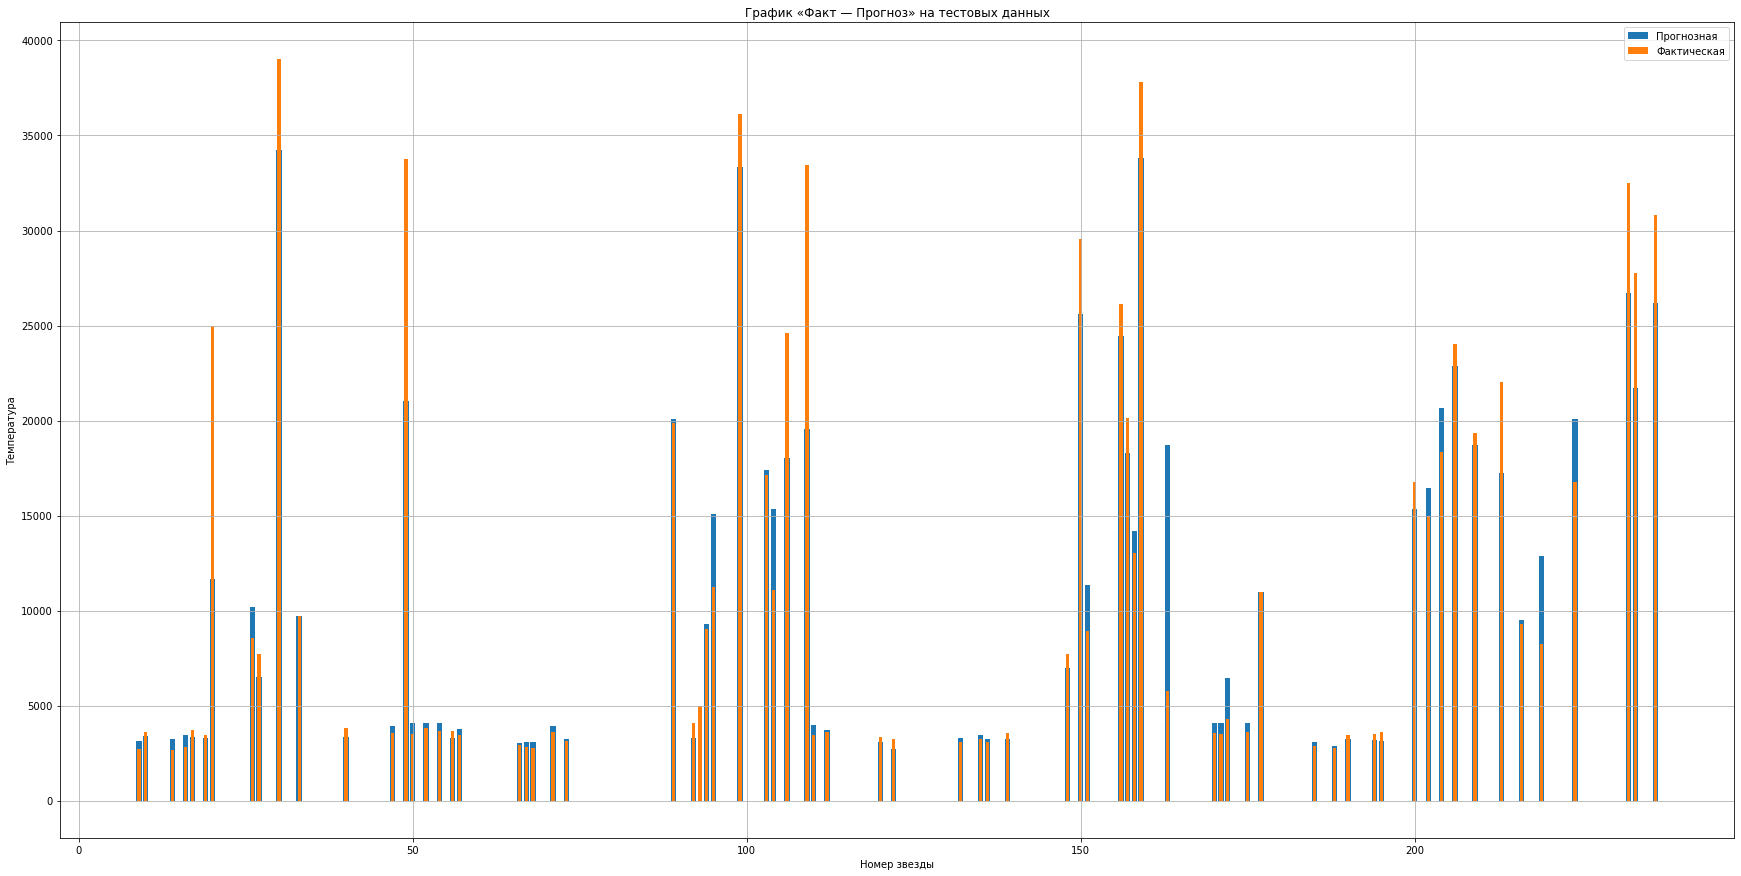

In [46]:
# Строим график
plt.figure(figsize=(30, 15))
plt.title('График «Факт — Прогноз» на тестовых данных' )
plt.xlabel('Номер звезды')
plt.ylabel('Температура')
plt.bar(x=pred_test.index, height = pred_test, width= 0.8 )
plt.bar(x=pred_test.index, height = target_test.sort_index(), width= 0.5 )
plt.legend(['Прогнозная', 'Фактическая'])
plt.grid(True)
plt.show() 

In [47]:
rmse_bm = sqrt(mean_squared_error(target_test.sort_index(), pred_test))
print(f'RMSE лучшей модели на тестовых данных -{rmse_bm: 2n}')

RMSE лучшей модели на тестовых данных - 3820.13


### Выводы

- Применение батчей улучшило модель, и сократило переобучение;
- «dropout» кажется не дает результата, модеть с сним не так сильно переобучается и кажется нужно еще немного эпох. Чем больше оключаемых слоев тем потребуется больше времени;
- Результаты очень близкие явного преимущества нет, на качество скорее влияет начальная архитектура и качество исходных данных. 

## Выводы

- Исходная модель в сравнении с моделью с батчеме чуть хуже справляется с самыми горячими звездами, но ненамного. 
- Новая модель с батчами более устойчива к переобучению, но выполняется дольше, использование всего 2 и 8 подвыборки разница не сильно ощутима.  
- Много зависит от начальной генерации, обе модели хорошшо справляются с холодными звездами до 5000 , в сегменте от 5000 до 20000 наблюдается завышении температуры, а в сегменте  выше 20000 ее занижение.